In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from LatticeData import *

# Create analyzer - instantiate class

In [2]:
analyzer = LatticeData()

# Systematics plots

In [3]:
df = analyzer.get_data()
sns.set_palette("magma", n_colors=len(df["length"].unique()))

In [5]:
itheta = 0.5*np.pi
beta = 1.6
length = 20
nMC = 10000
ntherm = 0
plot_params = {"beta": beta, "nMC": nMC}#,"itheta": itheta, "length": length, "ntherm": ntherm}
df_systematics = analyzer.get_data(**plot_params)

In [6]:
df_systematics.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,nMC,...,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im,dt
0,0,100.0,-3.507803,-155.512769,-155.512769,-0.824800,6.964259,3.693286,0.480,10000.0,...,41,41,77,0.036694,0.890296,2.710455,0.223807,0.046216,-1.121317,NaN
1,1,100.0,-1.183322,-234.980899,-234.980899,-1.587746,6.964259,3.693286,0.425,10000.0,...,41,41,77,0.050911,1.235238,2.710455,0.223807,0.033310,-0.808187,NaN
2,2,100.0,-5.518374,-284.688510,-284.688510,-5.380676,6.964259,3.693286,0.380,10000.0,...,41,41,77,0.093722,2.273938,2.710455,0.223807,0.018095,-0.439020,NaN
3,3,100.0,0.188157,-320.001736,-320.001736,-9.715618,6.964259,3.693286,0.355,10000.0,...,41,41,77,0.125939,3.055593,2.710455,0.223807,0.013466,-0.326714,NaN
4,4,100.0,-2.155681,-345.995462,-345.995462,-12.525632,6.964259,3.693286,0.316,10000.0,...,41,41,77,0.142996,3.469445,2.710455,0.223807,0.011860,-0.287742,NaN


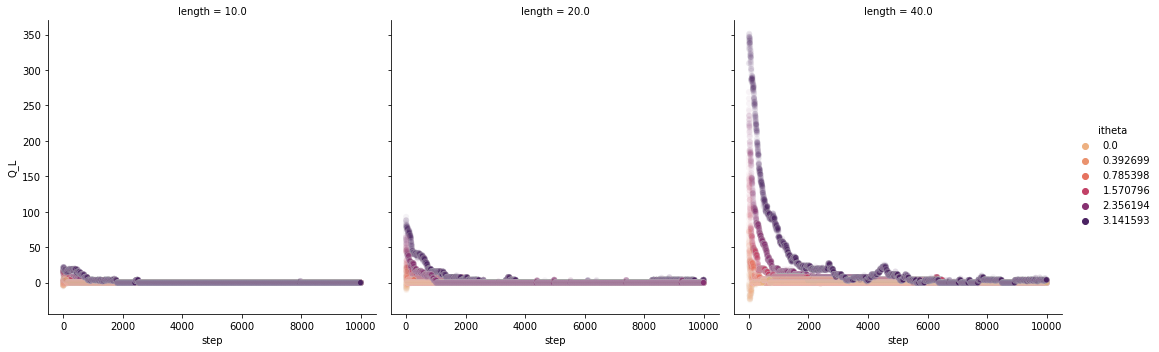

In [7]:
sns.relplot(data = df_systematics, x = "step", y = "Q_L", hue = "itheta",col = "length",
            alpha = 0.05,palette = "flare" )
plt.show()

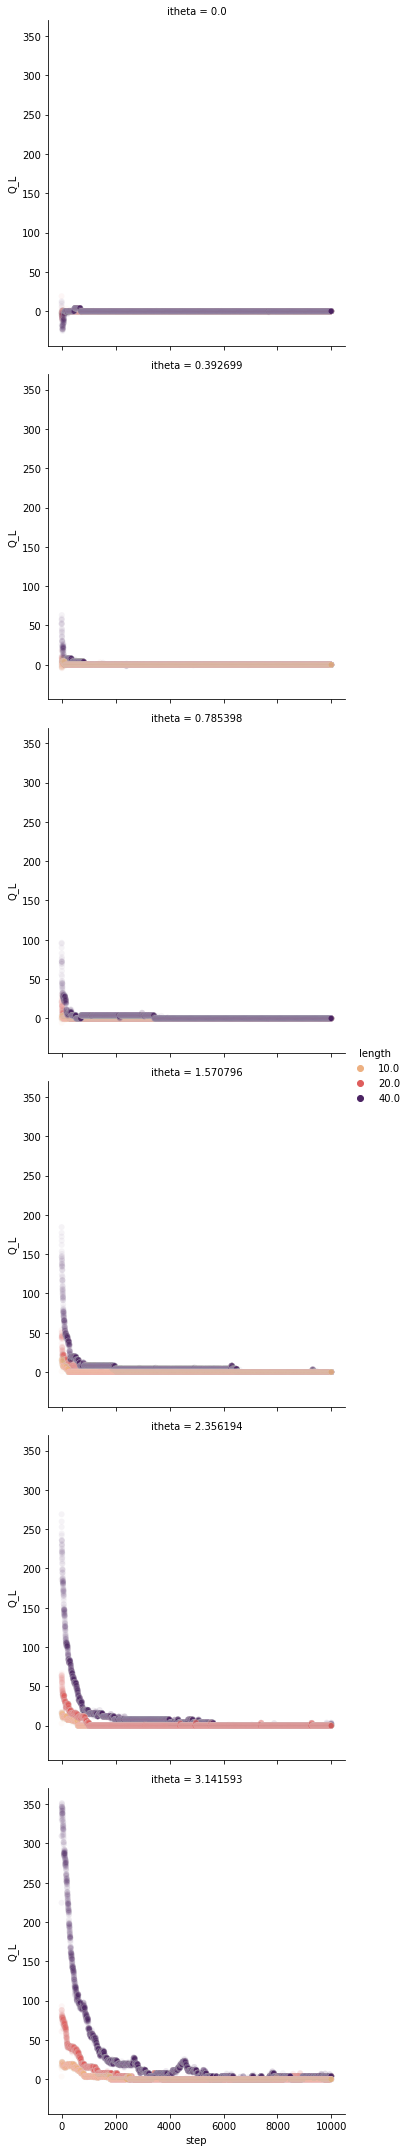

In [8]:
sns.relplot(data = df_systematics, x = "step", y = "Q_L", hue = "length",row = "itheta",
            alpha = 0.05,palette = "flare" )
plt.show()

In [9]:
itheta = 0.5*np.pi
beta = 1.6
length = 20
nMC = 10000
ntherm = 0
acf_params = {"beta": beta, "nMC": nMC,"itheta": itheta, "length": length, "ntherm": ntherm}

In [14]:
run = analyzer.get_data(single_run = True,suppress_output = False,**acf_params)

nMC 10000
ntherm 0
itheta 1.570796
beta 1.6
length 20


In [15]:
run.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,nMC,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,400.0,44.004539,-639.184095,-708.306263,12.083049,-4.911029,-7.799084,0.517500,10000.0,...,1212,197,102,950,7.523232,0.947879,2.07976,-0.532527,0.130845,-0.016486
1,1,400.0,53.522324,-842.430486,-926.503156,21.124589,-4.911029,-7.799084,0.416250,10000.0,...,1212,197,102,950,9.947417,1.253311,2.07976,-0.532527,0.098958,-0.012468
2,2,400.0,44.098687,-1018.503388,-1087.773443,36.059792,-4.911029,-7.799084,0.384167,10000.0,...,1212,197,102,950,12.996542,1.637481,2.07976,-0.532527,0.075741,-0.009543
3,3,400.0,36.656569,-1178.752539,-1236.332543,38.259597,-4.911029,-7.799084,0.350625,10000.0,...,1212,197,102,950,13.387096,1.686689,2.07976,-0.532527,0.073532,-0.009265
4,4,400.0,46.401385,-1265.404055,-1338.291180,28.571335,-4.911029,-7.799084,0.314500,10000.0,...,1212,197,102,950,11.568617,1.457572,2.07976,-0.532527,0.085090,-0.010721


In [16]:
decorr = analyzer.ta(run["Q_L"])

In [17]:
run = analyzer.autocorrelation(run)

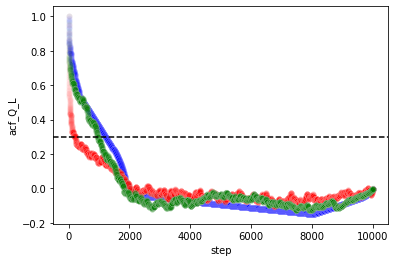

In [18]:
sns.scatterplot(data = run, x = "step", y = "acf_Q_L", color = "blue", alpha = 0.05)
sns.scatterplot(data = run, x = "step", y = "acf_A_L", color = "red", alpha = 0.05)
sns.scatterplot(data = run, x = "step", y = "acf_Xi_L", color = "green", alpha = 0.05)
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

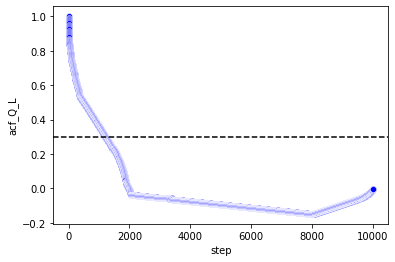

In [19]:
sns.scatterplot(data = run, x = "step", y = "acf_Q_L", color = "blue")
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

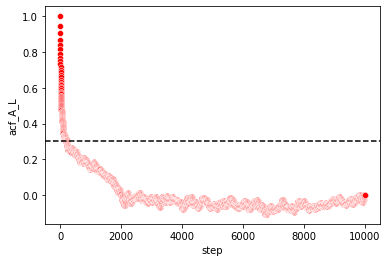

In [20]:
sns.scatterplot(data = run, x = "step", y = "acf_A_L", color = "red")
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

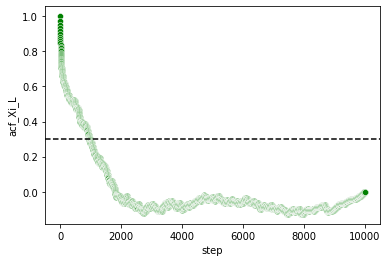

In [21]:
sns.scatterplot(data = run, x = "step", y = "acf_Xi_L", color = "green")
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

In [23]:
df_ta = analyzer.do_stats(therm = 0.4, **plot_params)
df_ta = df_ta[['Q_L_ta', 'A_L_ta', 'S_L_ta', 'Xi_L_ta']]
df_ta = df_ta.rename(columns = {'Q_L_ta':"Q_L", 'A_L_ta':"A_L", 'S_L_ta':"S_L", 'Xi_L_ta':"Xi_L"})
df_ta.columns.name = "observable"
df_ta = df_ta.stack()
df_ta.name = "ta"
df_ta = df_ta.to_frame()

In [24]:
df_ta.head()

ta
length itheta   beta nMC     ntherm observable      
10.0   0.000000 1.6  10000.0 0.0    Q_L         17.0
                                    A_L         41.0
                                    S_L         41.0
                                    Xi_L        77.0
       0.392699 1.6  10000.0 0.0    Q_L         69.0

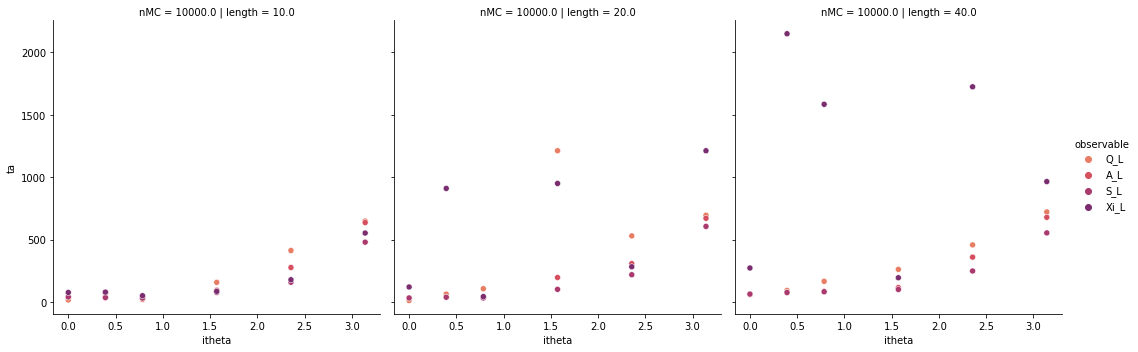

In [25]:
sns.relplot(data = df_ta, x = "itheta", y = "ta", hue = "observable", col = "length", row = "nMC",
           palette = analyzer.palette)
plt.show()

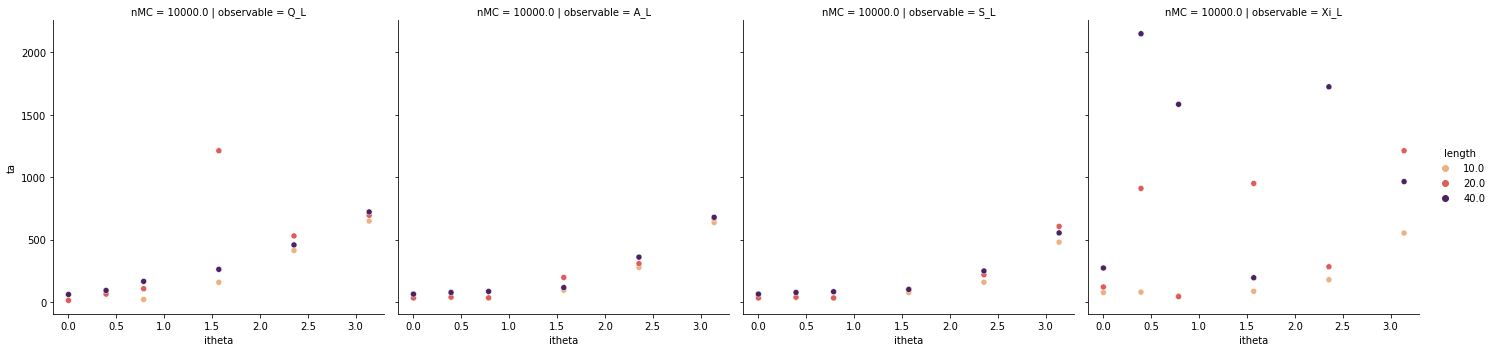

In [26]:
sns.relplot(data = df_ta, x = "itheta", y = "ta", hue = "length", col = "observable", row = "nMC",
           palette = analyzer.palette)
plt.show()

# Timing

Note, not all output files have timing info, so we will need to deal with nans.

In [27]:
df_dt = analyzer.get_data()

In [28]:
df_dt = df_dt.dropna(subset = ['dt'])

In [29]:
df_dt.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,nMC,...,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im,dt
0,0,400.0,18.077254,-679.011358,-686.110279,4.857546,-8.477229,-10.059239,0.545000,10000.0,...,40,39,910,5.957605,1.300906,1.213033,-0.556281,0.160213,-0.034984,1.0
1,1,400.0,9.525227,-912.800400,-916.540948,20.082285,-8.477229,-10.059239,0.415000,10000.0,...,40,39,910,12.113505,2.645111,1.213033,-0.556281,0.078795,-0.017206,3.0
2,2,400.0,11.144178,-1063.494525,-1067.870833,24.387657,-8.477229,-10.059239,0.375833,10000.0,...,40,39,910,13.348987,2.914892,1.213033,-0.556281,0.071503,-0.015613,4.0
3,3,400.0,8.744022,-1182.397096,-1185.830865,33.320123,-8.477229,-10.059239,0.342500,10000.0,...,40,39,910,15.603304,3.407146,1.213033,-0.556281,0.061172,-0.013358,5.0
4,4,400.0,6.869162,-1272.404184,-1275.101698,34.713914,-8.477229,-10.059239,0.312500,10000.0,...,40,39,910,15.926306,3.477677,1.213033,-0.556281,0.059932,-0.013087,7.0


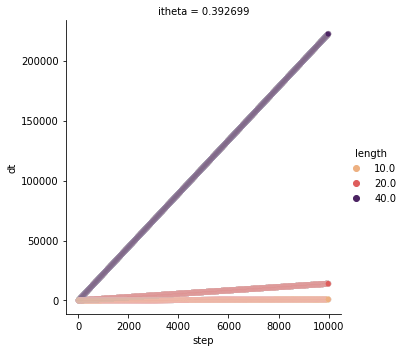

In [30]:
sns.relplot(data = df_dt, x = "step", y = "dt", hue = "length",col = "itheta",
            alpha = 0.05,palette = "flare" )
plt.show()

In [31]:
df_time = analyzer.do_stats()

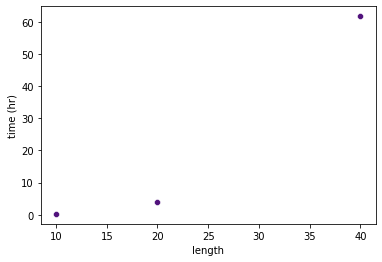

In [32]:
sns.scatterplot(data = df_time, x = "length", y = "time (hr)")
#plt.yscale('log')
plt.show()